In [1]:
import numpy as np
import matplotlib.pyplot as plt\
# import seaborn as sns
from matplotlib import cm
import pandas as pd
import os
from scipy import stats
from numpy import genfromtxt
from scipy.integrate import quad
import matplotlib.ticker as mtick
import scipy
import pickle


In [2]:
projPath = 'C:/Users/WeNieds/Repos/SIS_externalRes/makeSimData/out/'

In [3]:
timeSpent_file = open(projPath+"SI_timeSpent.pkl",'rb')
timeSpent_dict = pickle.load(timeSpent_file)
timeSpent_file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/WeNieds/Repos/SIS_externalRes/makeSimData/out/SI_timeSpent.pkl'

In [4]:
timeSpent_dict.keys()
timeMat = timeSpent_dict['timeSpent Matrix']
timeMat[timeMat<0] = 0 
kappa_vec = timeSpent_dict['kval Vector']
N_vec = timeSpent_dict['Nval Vector']

In [33]:
import scipy
from scipy.optimize import minimize
from scipy import stats

def DpdfSISkappa(ln_N,mu,gam,beta,kappa):
    return( 
        np.log(beta / (np.exp(ln_N)*(gam+mu)))  + scipy.special.digamma(np.exp(ln_N)*kappa/beta) + scipy.special.digamma(np.exp(ln_N)+1)-scipy.special.digamma(1)
    )

def objFun(ln_N,mu,gam,beta,kappa):
    return( np.log(DpdfSISkappa(ln_N,mu,gam,beta,kappa)**2 ))

my_mu = 5e-5
my_gam=1.0
my_beta=0.5

len_out = 20
log_kappa_list = np.linspace(-7,-4,len_out)
kappa_list = 10**log_kappa_list
# Initialize results vector
res_vec_zero = np.zeros([len_out,2])

for i in range(len(kappa_list)):
    kappa_in = kappa_list[i]
    def f(x):
        return( objFun(x,my_mu,my_gam,my_beta,kappa_in) )
    res = scipy.optimize.minimize(f,10,method='L-BFGS-B')
    N_opt = np.exp(res.x[0])
    res_vec_zero[i,0] = kappa_in
    res_vec_zero[i,1] = N_opt


<ipython-input-33-e2c9ad6a73c4>:7: RuntimeWarning: overflow encountered in exp
  np.log(beta / (np.exp(ln_N)*(gam+mu)))  + scipy.special.digamma(np.exp(ln_N)*kappa/beta) + scipy.special.digamma(np.exp(ln_N)+1)-scipy.special.digamma(1)
<ipython-input-33-e2c9ad6a73c4>:7: RuntimeWarning: divide by zero encountered in log
  np.log(beta / (np.exp(ln_N)*(gam+mu)))  + scipy.special.digamma(np.exp(ln_N)*kappa/beta) + scipy.special.digamma(np.exp(ln_N)+1)-scipy.special.digamma(1)
<ipython-input-33-e2c9ad6a73c4>:7: RuntimeWarning: invalid value encountered in add
  np.log(beta / (np.exp(ln_N)*(gam+mu)))  + scipy.special.digamma(np.exp(ln_N)*kappa/beta) + scipy.special.digamma(np.exp(ln_N)+1)-scipy.special.digamma(1)
<ipython-input-33-e2c9ad6a73c4>:11: RuntimeWarning: overflow encountered in square
  return( np.log(DpdfSISkappa(ln_N,mu,gam,beta,kappa)**2 ))
C:\Users\WeNieds\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun

In [44]:
def objFun2(ln_N,mu,gam,beta,kappa):
    return( ( DpdfSISkappa(ln_N,mu,gam,beta,kappa) + 1 )**2 )

my_mu = 5e-5
my_gam=1.0
my_beta=0.5

len_out = 20
log_kappa_list = np.linspace(-7,-4,len_out)
kappa_list = 10**log_kappa_list
# Initialize results vector
res_vec_negOne = np.zeros([len_out,2])

for i in range(len(kappa_list)):
    kappa_in = kappa_list[i]
    def f(x):
        return( objFun2(x,my_mu,my_gam,my_beta,kappa_in) )
    res = scipy.optimize.minimize(f,3,method='L-BFGS-B')
    N_opt = np.exp(res.x[0])
    res_vec_negOne[i,0] = kappa_in
    res_vec_negOne[i,1] = N_opt


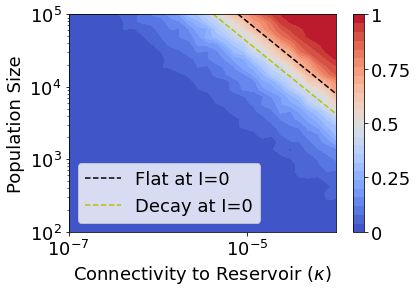

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)

# coolwarm_reversed = matplotlib.cm.get_cmap('coolwarm_r')

plot1 = plt.contourf(kappa_vec,N_vec,1-timeMat,levels=25,cmap = cm.coolwarm)
plt.ylabel('Population Size')
plt.xlabel('Connectivity to Reservoir ($\kappa$)')
plt.plot(res_vec_zero[:,0],res_vec_zero[:,1],'k--')
plt.plot(res_vec_negOne[:,0],res_vec_negOne[:,1],'y--')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))
plt.ylim([100,100000])
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(["Flat at I=0","Decay at I=0"],
          loc="lower left")


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = plt.colorbar(plot1, ticks=np.linspace(0,1.0,5))
cbar.ax.set_yticklabels(['0','0.25','0.5','0.75', '1'])  # vertically oriented colorbar
plt.savefig("TimeDiseasePresent_colormap_kappaN.pdf", bbox_inches='tight')

In [97]:
scipy.special.loggamma(20)
np.log(scipy.special.gamma(20))

def pdf(x,N,kappa):
    beta,gam,mu = 0.5,1,1e-5
    return(
        np.exp( scipy.special.loggamma(N+1) + \
       scipy.special.loggamma(N*kappa/beta+x) - \
       scipy.special.loggamma(N-x+1) - \
       scipy.special.loggamma(x+1) - \
       scipy.special.loggamma(N*kappa/beta) + \
       x*(np.log(beta)-np.log(N)-np.log(gam+mu))
      )
    )
def pynot(N,kappa):
    return(
        scipy.integrate.quad(lambda x: pdf(x,N,kappa), 0, 100)[0]
    )


In [100]:
len_out = 20
log_kappa_list = np.linspace(-7,-4,len_out)
kappa_list = 10**log_kappa_list
log_N_list = np.linspace(2,5,len_out)
N_list = 10**log_N_list

pynot_mat = np.zeros([len_out,len_out])

ii=0
jj=0
for i in N_list:
    for j in kappa_list:
        pynot_util = pynot(i,j)
        if (pynot_util=="nan"):
            pynot_mat[ii,jj] = 0
        else:
            pynot_mat[ii,jj] = pynot_util**(-1)
        jj+=1
    ii+=1
    jj=0



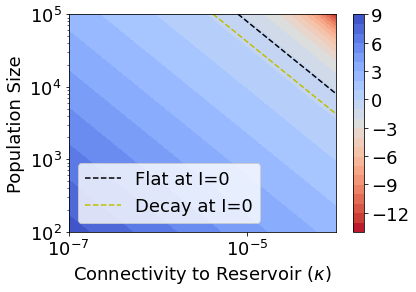

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)

coolwarm_reversed = plt.cm.get_cmap('coolwarm_r')
plot1 = plt.contourf(kappa_list,N_list,np.log(pynot_mat),levels=25,cmap = coolwarm_reversed)
plt.ylabel('Population Size')
plt.xlabel('Connectivity to Reservoir ($\kappa$)')
plt.plot(res_vec_zero[:,0],res_vec_zero[:,1],'k--')
plt.plot(res_vec_negOne[:,0],res_vec_negOne[:,1],'y--')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))
plt.ylim([100,100000])
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(["Flat at I=0","Decay at I=0"],
          loc="lower left")


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = plt.colorbar(plot1)
plt.savefig("pynot_colormap_kappaN.pdf", bbox_inches='tight')

In [ ]:
# pretty sure below this point is scratch work from another notebook

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.ticker as mtick
import scipy
import seaborn as sns
from matplotlib import cm
from scipy.optimize import minimize

def DpdfSISkappa(N,mu,gam,beta,ln_kappa):
    return(np.log(beta/(N*(gam+mu)))+scipy.special.digamma(N*np.exp(ln_kappa)/beta)+scipy.special.digamma(N+1)-scipy.special.digamma(1))
def deriv_PDF_atzero_eqzero(N,mu,gam,beta,ln_kappa):
    return( (DpdfSISkappa(N,mu,gam,beta,ln_kappa)+1)**2 )
my_mu = 5e-5
my_gam=1.0

len_out = 100
# make sample list of N values
N_list = np.array([10.0 ** 4])
# beta values
B_list = np.linspace(0.01,2.5,len_out)


# Initialize results vector
res_vec_zero = np.zeros([len_out,2])
# Only one N val here
N_in = N_list[0]
for i in range(len(B_list)):
    beta_in = B_list[i]
    def f(x):
        return( deriv_PDF_atzero_eqzero(N_in,my_mu,my_gam,beta_in,x) )
    res = scipy.optimize.minimize(f,-5,method='L-BFGS-B')
    kappa_opt = np.exp(res.x[0])
    res_vec_zero[i,0] = beta_in
    res_vec_zero[i,1] = kappa_opt*N_in

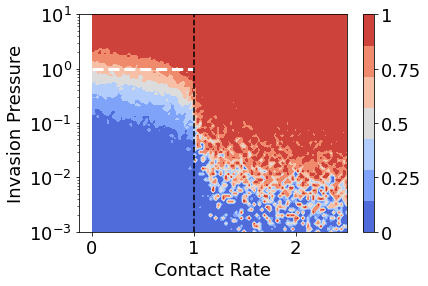

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = plt.contourf(B_list,kappa_list*N_list[0],timeMat,cmap = cm.coolwarm)

plt.ylabel('Invasion Pressure')
plt.xlabel('Contact Rate')
# ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%1.1e'))
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%1.0e'))
ax.set_yscale('log')
# ax.set_xscale('log')

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

R0_curve = lambda mu_in,gamma_in : (mu_in + gamma_in)
plt.axvline(x=R0_curve(1e-5,1),linestyle ="--",color="black")

plt.hlines(y=1,xmin=0,xmax=1,color='white',linestyle='--',linewidth=3)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = plt.colorbar(plot1, ticks=np.linspace(0,1.05,5))
cbar.ax.set_yticklabels(['0','0.25','0.5','0.75', '1'])  # vertically oriented colorbar

plt.ylim([1e-3,1e1])
plt.savefig("TimeDiseasePresent_colormap.pdf", bbox_inches='tight')